# Overshadowing Attacks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
palette = 'colorblind'

sns.set_theme(palette=palette, color_codes=True)
sns.set_style('ticks')
sns.set_context('notebook')
sns.color_palette(palette)

plt.rcParams['figure.dpi'] = 200 # 72
#plt.rcParams['savefig.dpi'] = 200

In [3]:
with open("data/overshadowing", 'r') as f:
    output = f.readlines()
    output = [ int(o) for o in output ]

with open("data/overshadowing_files", 'r') as f:
    output_files = f.readlines()
    output_files = [ [ int(a) for a in o.split("/")[-1][:-5].split("_")[1:] ] for o in output_files ]

data = [ output_files[i] + [output[i]] for i in range(len(output)) ]

In [4]:
df = pd.DataFrame(data, columns=["channel_noise_victim", "channel_noise_attacker", "overshadow_strength", "accuracy"])
df.overshadow_strength = df.overshadow_strength / 10
df.accuracy = df.accuracy / 1024
df.channel_noise_victim = df.channel_noise_victim == 1
df.channel_noise_attacker = df.channel_noise_attacker == 1
df

,channel_noise_victim,channel_noise_attacker,overshadow_strength,accuracy
0,True,True,3.9,1.000000
1,True,True,5.1,1.000000
2,False,False,7.4,1.000000
3,False,True,0.5,0.000000
4,False,True,1.7,0.886719
...,...,...,...,...
399,False,False,8.5,1.000000
400,True,True,4.7,1.000000
401,False,True,3.7,1.000000
402,True,False,2.8,0.486328


Text(0.5, 0, 'Relative Overshadowing Strength')

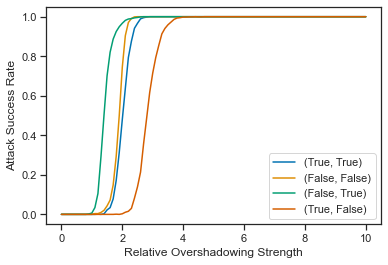

In [5]:
sns.lineplot(data=df, x='overshadow_strength', y='accuracy', hue=df[['channel_noise_victim', 'channel_noise_attacker']].apply(tuple, axis=1))

plt.ylabel("Attack Success Rate")
plt.xlabel("Relative Overshadowing Strength")

In [6]:
with open("data/overshadowing_noise1_1", 'r') as f:
    output = f.readlines()
    output = [ int(o) for o in output ]

with open("data/overshadowing_files_noise1_1", 'r') as f:
    output_files = f.readlines()
    output_files = [ [ float(a) for a in o.split("/")[-1][:-5].split("_")[1:] ] for o in output_files ]

data = [ output_files[i] + [output[i]] for i in range(len(output)) ]

df_noise1 = pd.DataFrame(data, columns=["noise_voltage", "overshadow_strength", "accuracy"])
df_noise1.overshadow_strength = df_noise1.overshadow_strength / 10
df_noise1.accuracy = df_noise1.accuracy / 1024
df_noise1['noise_voltage_str'] = df_noise1.noise_voltage.apply(str)
df_noise1

,noise_voltage,overshadow_strength,accuracy,noise_voltage_str
0,0.050,9.6,1.000000,0.05
1,0.005,4.4,1.000000,0.005
2,0.010,6.0,1.000000,0.01
3,0.500,9.1,1.000000,0.5
4,0.005,3.5,1.000000,0.005
...,...,...,...,...
601,0.500,3.1,0.834961,0.5
602,0.100,1.5,0.013672,0.1
603,0.010,5.0,1.000000,0.01
604,0.500,8.4,0.999023,0.5


In [7]:
with open("data/overshadowing_noise2_1", 'r') as f:
    output = f.readlines()
    output = [ int(o) for o in output ]

with open("data/overshadowing_files_noise2_1", 'r') as f:
    output_files = f.readlines()
    output_files = [ [ float(a) for a in o.split("/")[-1][:-5].split("_")[1:] ] for o in output_files ]

data = [ output_files[i] + [output[i]] for i in range(len(output)) ]

df_noise2 = pd.DataFrame(data, columns=["noise_voltage", "overshadow_strength", "accuracy"])
df_noise2.overshadow_strength = df_noise2.overshadow_strength / 10
df_noise2.accuracy = df_noise2.accuracy / 1024
df_noise2['overshadow_strength_str'] = df_noise2.overshadow_strength.apply(str)
df_noise2

,noise_voltage,overshadow_strength,accuracy,overshadow_strength_str
0,0.16,1.0,0.000000,1.0
1,0.99,1.0,0.000000,1.0
2,0.65,2.0,0.041992,2.0
3,0.36,4.0,0.999023,4.0
4,0.61,3.0,0.603516,3.0
...,...,...,...,...
500,0.01,5.0,1.000000,5.0
501,0.33,2.0,0.215820,2.0
502,0.60,2.0,0.055664,2.0
503,0.98,4.0,0.297852,4.0


<AxesSubplot:xlabel='overshadow_strength', ylabel='accuracy'>

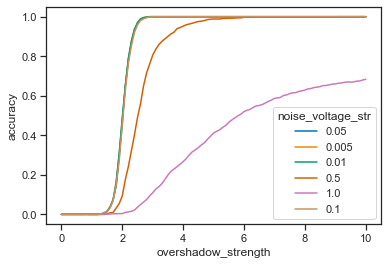

In [8]:
sns.lineplot(data=df_noise1, x='overshadow_strength', y='accuracy', hue='noise_voltage_str')

<AxesSubplot:xlabel='noise_voltage', ylabel='accuracy'>

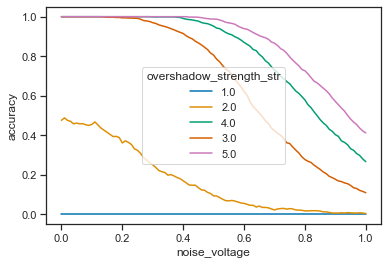

In [9]:
sns.lineplot(data=df_noise2, x='noise_voltage', y='accuracy', hue='overshadow_strength_str')

In [10]:
df_noise1_2 = pd.read_csv("data/overshadowing_noise1_2")
df_noise1_2.accuracy = df_noise1_2.accuracy / 1024
df_noise1_2['noise_voltage'] = df_noise1_2.filename.apply(lambda x: float(x.split('/')[-1][:-4].split("_")[1]))
df_noise1_2['overshadow_strength'] = df_noise1_2.filename.apply(lambda x: int(x.split('/')[-1][:-4].split("_")[2]) / 10)
df_noise1_2['noise_voltage_str'] = df_noise1_2['noise_voltage'].apply(str)
df_noise1_2['overshadow_strength_str'] = df_noise1_2['overshadow_strength'].apply(str)
df_noise1_2['snr'] = df_noise1_2.noise_voltage.apply(lambda x: 0.0 if x == 0.0 else 1.0/(x*x))

df_noise1_2

,filename,accuracy,noise_voltage,overshadow_strength,noise_voltage_str,overshadow_strength_str,snr
0,/home/ubuntu/firefly/gnuradio/samples/results_...,1.000000,0.0,4.4,0.0,4.4,0.000000
1,/home/ubuntu/firefly/gnuradio/samples/results_...,1.000000,0.2,6.0,0.2,6.0,25.000000
2,/home/ubuntu/firefly/gnuradio/samples/results_...,0.000000,2.0,3.6,2.0,3.6,0.250000
3,/home/ubuntu/firefly/gnuradio/samples/results_...,0.001953,2.0,8.7,2.0,8.7,0.250000
4,/home/ubuntu/firefly/gnuradio/samples/results_...,0.781250,1.0,17.3,1.0,17.3,1.000000
...,...,...,...,...,...,...,...
2809,/home/ubuntu/firefly/gnuradio/samples/results_...,1.000000,0.5,15.4,0.5,15.4,4.000000
2810,/home/ubuntu/firefly/gnuradio/samples/results_...,0.853516,0.9,11.6,0.9,11.6,1.234568
2811,/home/ubuntu/firefly/gnuradio/samples/results_...,0.641602,1.0,8.3,1.0,8.3,1.000000
2812,/home/ubuntu/firefly/gnuradio/samples/results_...,0.301758,0.9,3.5,0.9,3.5,1.234568


In [33]:
df_noise2_2 = pd.read_csv("data/overshadowing_noise2_2")
df_noise2_3 = pd.read_csv("data/overshadowing_noise2_3")
df_noise2_2 = pd.concat([df_noise2_2, df_noise2_3], ignore_index=True)
df_noise2_2.accuracy = df_noise2_2.accuracy / 1024
df_noise2_2['noise_voltage'] = df_noise2_2.filename.apply(lambda x: float(x.split('/')[-1][:-4].split("_")[1]))
df_noise2_2['overshadow_strength'] = df_noise2_2.filename.apply(lambda x: int(x.split('/')[-1][:-4].split("_")[2]) / 10)
df_noise2_2['noise_voltage_str'] = df_noise2_2['noise_voltage'].apply(str)
df_noise2_2['overshadow_strength_str'] = df_noise2_2['overshadow_strength'].apply(str)
df_noise2_2['snr'] = df_noise2_2.noise_voltage.apply(lambda x: 0.0 if x == 0.0 else 1.0/(x*x))

df_noise2_2

,filename,accuracy,noise_voltage,overshadow_strength,noise_voltage_str,overshadow_strength_str,snr
0,/home/ubuntu/firefly/gnuradio/samples/results_...,0.118164,1.19,4.0,1.19,4.0,0.706165
1,/home/ubuntu/firefly/gnuradio/samples/results_...,0.000000,1.62,1.0,1.62,1.0,0.381039
2,/home/ubuntu/firefly/gnuradio/samples/results_...,0.340820,0.76,3.0,0.76,3.0,1.731302
3,/home/ubuntu/firefly/gnuradio/samples/results_...,1.000000,0.33,7.0,0.33,7.0,9.182736
4,/home/ubuntu/firefly/gnuradio/samples/results_...,0.400391,0.72,3.0,0.72,3.0,1.929012
...,...,...,...,...,...,...,...
2206,/home/josh/git/firefly/gnuradio/samples/result...,0.000000,2.00,2.5,2.0,2.5,0.250000
2207,/home/josh/git/firefly/gnuradio/samples/result...,0.031250,1.02,2.5,1.02,2.5,0.961169
2208,/home/josh/git/firefly/gnuradio/samples/result...,0.006836,1.28,2.5,1.28,2.5,0.610352
2209,/home/josh/git/firefly/gnuradio/samples/result...,0.079102,0.87,2.5,0.87,2.5,1.321178


In [34]:
vs = list(df_noise1_2.noise_voltage.unique())
vs.sort()
vs

[0.0, 0.0001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 4.0]

<AxesSubplot:xlabel='overshadow_strength', ylabel='accuracy'>

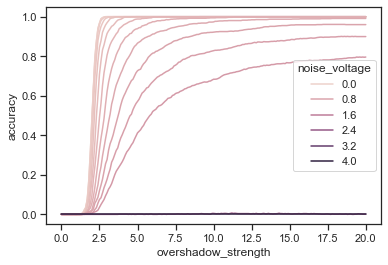

In [13]:
sns.lineplot(data=df_noise1_2, x='overshadow_strength', y='accuracy', hue='noise_voltage')

In [65]:
dict(a=4)

{'a': 4}

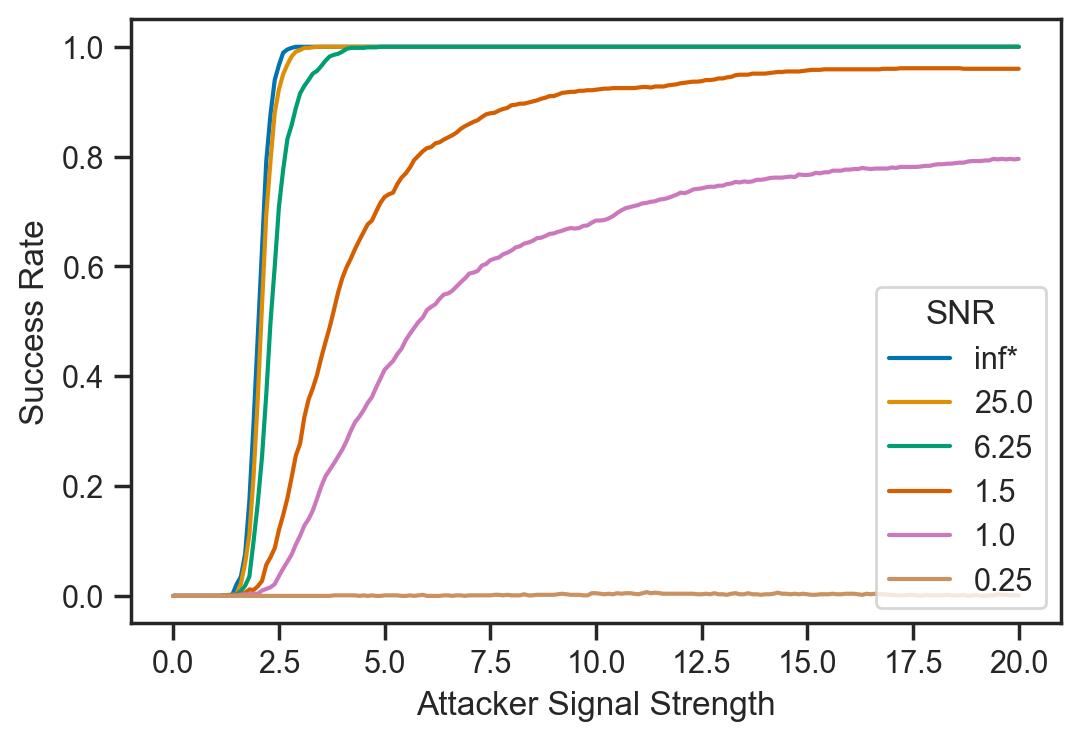

In [77]:
def snr_str(v):
    if v == 0.0:
        return "inf*"
    elif v == 0.0001:
        return "100000000"
    elif v == 0.2:
        return "25.0"
    elif v == 0.4:
        return "6.25"
    elif v == 0.8:
        return "1.5"
    elif v == 1.0:
        return "1.0"
    elif v == 2.0:
        return "0.25"

noises = [0.0, 0.2, 0.4, 0.8, 1.0, 2.0]
snrs_order = [ snr_str(n) for n in noises ]
df_filtered = df_noise1_2[df_noise1_2.noise_voltage.isin(noises)].copy()
df_filtered['snr_str'] = df_filtered.apply(lambda row: snr_str(row.noise_voltage), axis=1)

#df_filtered.loc[df_filtered.noise_voltage == 0.0001]['snr_str'] = "100000000"
#df_filtered[df_filtered.noise_voltage == 0.2]['snr_str'] = "25.0"
#df_filtered[df_filtered.noise_voltage == 0.4]['snr_str'] = "6.25"
#df_filtered[df_filtered.noise_voltage == 0.8]['snr_str'] = "1.5"
#df_filtered[df_filtered.noise_voltage == 1.0]['snr_str'] = "1.0"
#df_filtered[df_filtered.noise_voltage == 2.0]['snr_str'] = "0.25"

sns.lineplot(data=df_filtered, x='overshadow_strength', y='accuracy', hue='snr_str', hue_order=snrs_order)

plt.xlabel("Attacker Signal Strength")
plt.ylabel("Success Rate")
l = plt.legend(title="SNR", loc="lower right")
plt.setp(l.get_title(), multialignment='center')

plt.savefig("plots/attack_strength.pdf")

<AxesSubplot:xlabel='noise_voltage', ylabel='accuracy'>

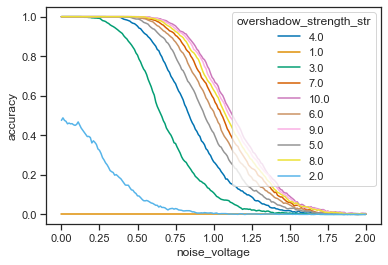

In [15]:
sns.lineplot(data=df_noise2_2, x='noise_voltage', y='accuracy', hue='overshadow_strength_str')

[None]

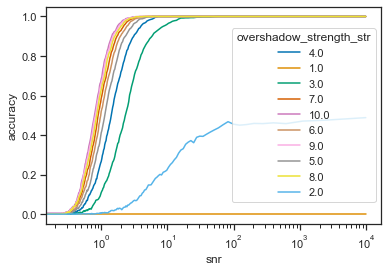

In [18]:
ax = sns.lineplot(data=df_noise2_2, x='snr', y='accuracy', hue='overshadow_strength_str')
ax.set(xscale='log')
#ax.set(xticks=sample_count)
#ax.set(xticklabels=sample_count)

[None, None]

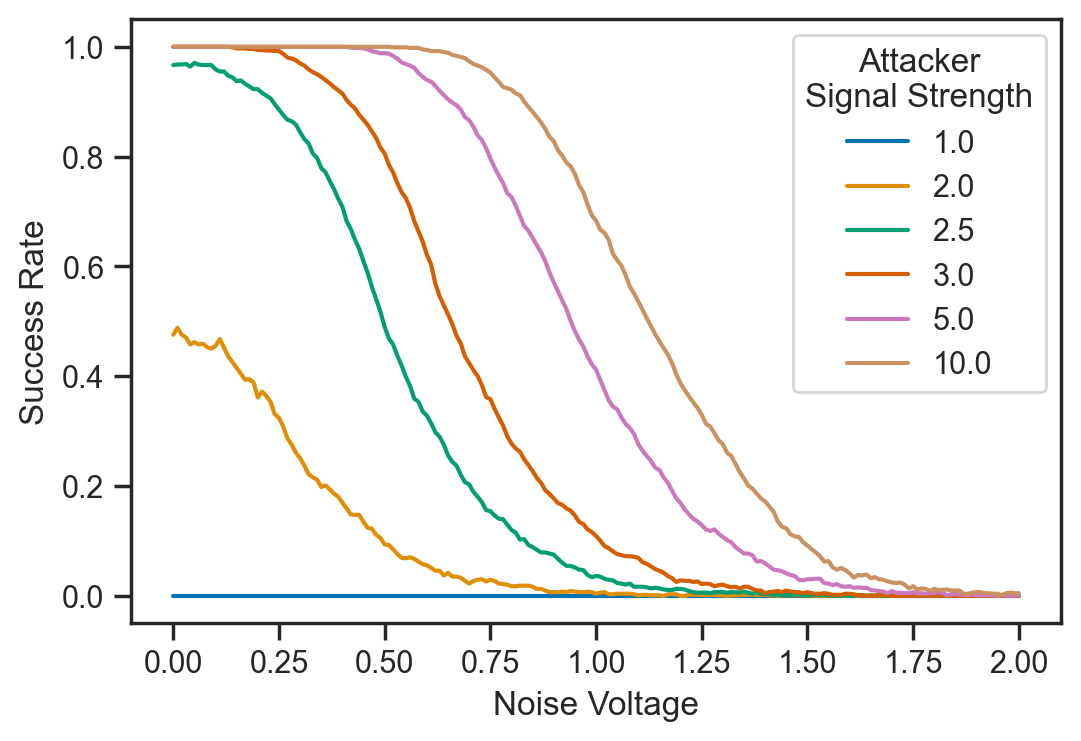

In [43]:
strengths = [1.0, 2.0, 2.5, 3.0, 5.0, 10.0]
strengths_order = [ str(s) for s in strengths ]
sns.lineplot(data=df_noise2_2[df_noise2_2.overshadow_strength.isin(strengths)], x='noise_voltage', y='accuracy', hue='overshadow_strength_str', hue_order=strengths_order)

plt.xlabel("Noise Voltage")
plt.ylabel("Success Rate")
l = plt.legend(title="Attacker\nSignal Strength")
plt.setp(l.get_title(), multialignment='center')

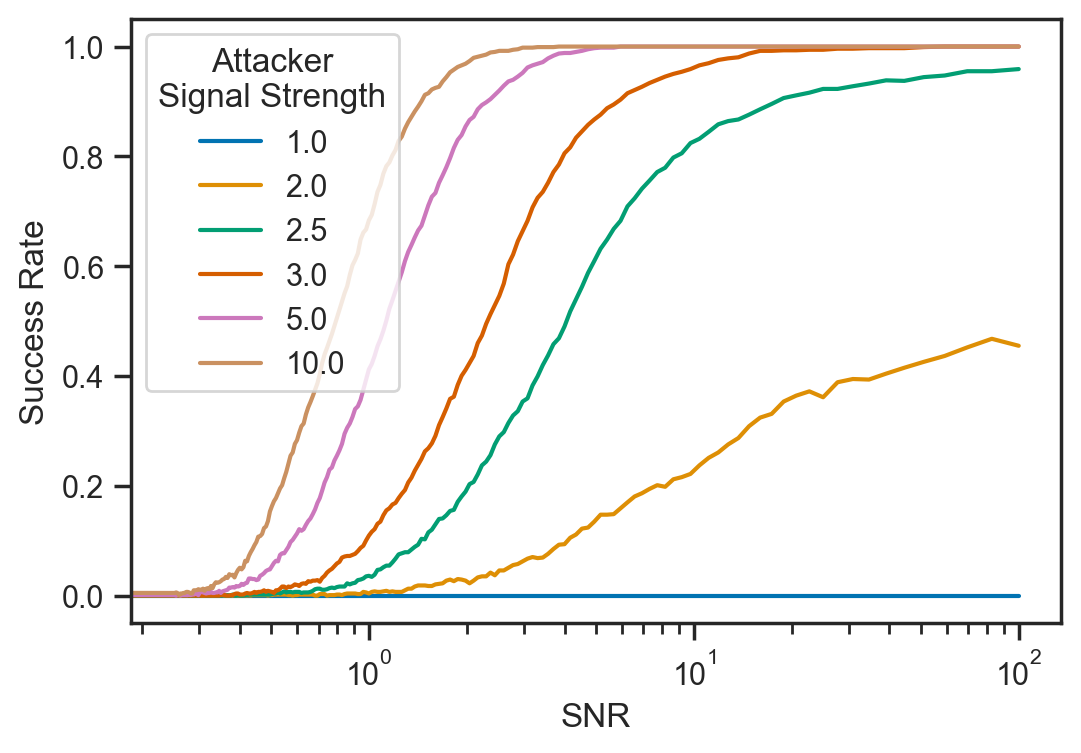

In [49]:
max_snr = 100
df_filtered = df_noise2_2[(df_noise2_2.overshadow_strength.isin(strengths)) & (df_noise2_2.snr <= max_snr)]
ax = sns.lineplot(data=df_filtered, x='snr', y='accuracy', hue='overshadow_strength_str', hue_order=strengths_order)

ax.set(xscale='log')
plt.xlabel("SNR")
plt.ylabel("Success Rate")
l = plt.legend(title="Attacker\nSignal Strength", loc="upper left")
plt.setp(l.get_title(), multialignment='center')

plt.savefig("plots/attack_snr.pdf")